In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn import preprocessing
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from matplotlib import pyplot as plt

#  New York Airbnb Price Prediction

This project aims to make model predictions of air bnb price in New York so the host are able to better determine the price of the property depending on neighborhood, room type, minimum nights and availability.

# Import Data

In [2]:
df = pd.read_csv('New York Airbnb_4 dec 2021.csv')
df.head()

C:\Users\opign\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,338,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,75,1,409,2021-10-22,4.86,1,194,32,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.52,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,123,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,507,2021-11-08,3.68,1,192,33,NaN


# Describing Data

In [3]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.827700e+04,3.827700e+04,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,28773.000000,38277.000000,38277.000000,38277.000000
mean,2.962239e+07,1.148305e+08,40.729206,-73.948967,170.858714,21.623769,23.302871,1.721019,17.747655,134.290984,5.032160
std,1.742239e+07,1.299194e+08,0.055752,0.050759,305.100271,29.573333,50.415484,4.399826,59.150451,143.196175,14.693768
min,2.595000e+03,2.438000e+03,40.504560,-74.249840,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.341048e+07,1.139462e+07,40.689260,-73.983270,70.000000,3.000000,1.000000,0.120000,1.000000,0.000000,0.000000
50%,3.081269e+07,5.005297e+07,40.725180,-73.954770,114.000000,30.000000,4.000000,0.480000,1.000000,73.000000,0.000000
75%,4.642855e+07,2.002395e+08,40.762680,-73.930430,189.000000,30.000000,20.000000,1.780000,3.000000,302.000000,3.000000
max,5.366510e+07,4.344080e+08,40.914020,-73.710870,10000.000000,1250.000000,1009.000000,141.000000,421.000000,365.000000,669.000000


In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [5]:
df.shape

(38277, 18)

# Exploratory Data Analysis

## What can we learn about price and room type  in different areas?

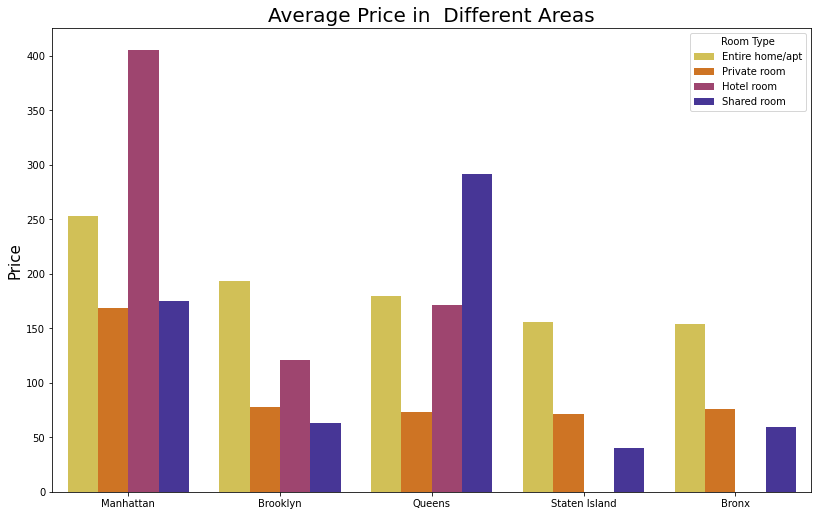

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

area = sns.barplot(x = 'neighbourhood_group', y = 'price', data = df,hue='room_type',palette="CMRmap_r", ci=None)
area.axes.set_title("Average Price in  Different Areas",fontsize=20)
area.set_xlabel(" ")
area.set_ylabel("Price", fontsize=15)
area.tick_params(labelsize=10)
plt.legend(title='Room Type')
plt.tight_layout(pad=3.0)

- Manhattan is the area with the most expensive average air bnb price in New York and hotel room as the most expensive room type
- In Queens, Shared room is the most expensive room type even more expensive than the one in Manhattan
- Hotel room in State Island and Bronx is the cheapest room type

## How many minimum nights a guest spend based on room type in different areas?

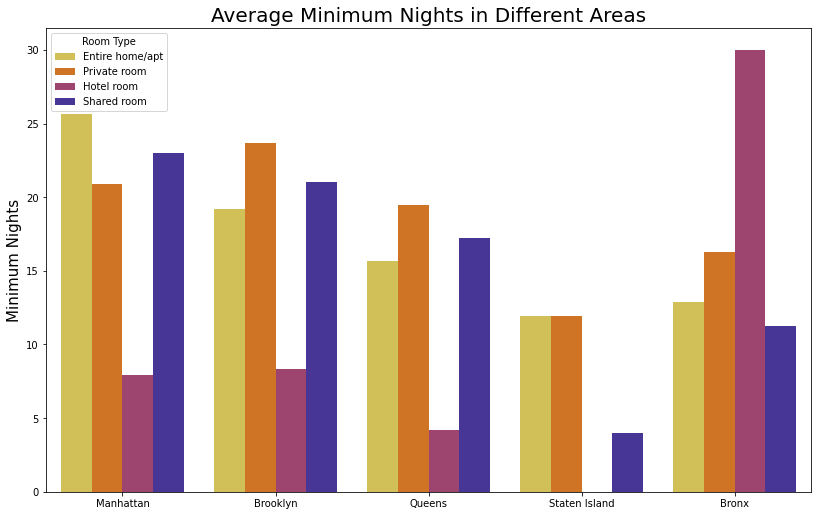

In [7]:
fig, ax = plt.subplots(figsize=(12,8))

night = sns.barplot(x = 'neighbourhood_group', y = 'minimum_nights', data = df,hue='room_type',palette="CMRmap_r", ci=None)
night.axes.set_title("Average Minimum Nights in Different Areas",fontsize=20)
night.set_xlabel(" ")
night.set_ylabel("Minimum Nights", fontsize=15)
night.tick_params(labelsize=10)
plt.legend(title='Room Type')
plt.tight_layout(pad=3.0)

- Most host with hotel room applies 30 nights minimum policy in Bronx. Based on previous graph, hotel room has cheapest average price per night of air bnb in Bronx
- Most host in Manhattan choosed to apply longer minimum nights on entire home/apartment, private room and shared room as they are cheaper than hotel room
- Hotel room in State Island is the least desirable place to stay because it has lowest minimum nights among all room type in every area 

## What is the average host listing count of each room type in every area ?

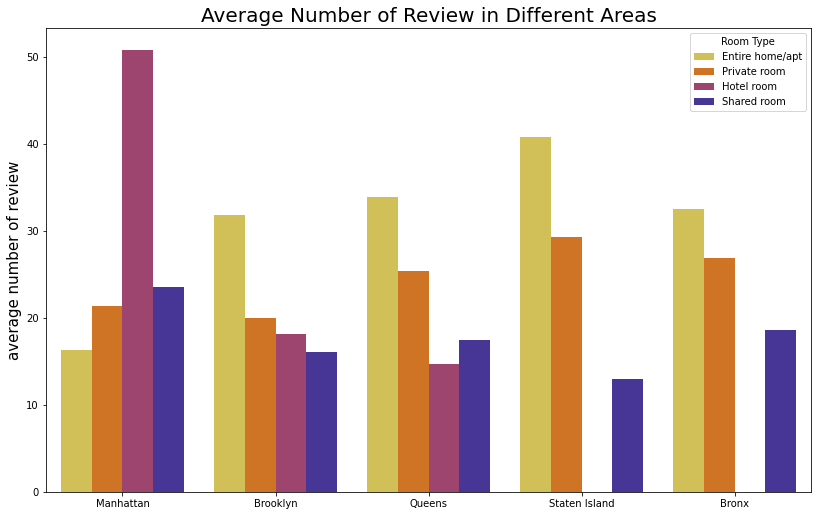

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

host = sns.barplot(x = 'neighbourhood_group', y = 'number_of_reviews', data = df,hue='room_type',palette="CMRmap_r", ci=None)
host.axes.set_title("Average Number of Review in Different Areas",fontsize=20)
host.set_xlabel(" ")
host.set_ylabel("average number of review", fontsize=15)
host.tick_params(labelsize=10)
host.legend(title='Room Type')
plt.tight_layout(pad=3.0)

- Hotel in Manhattan has highest average number of review. It indicates that hotel is the most favorite place to stay in Manhattan
- Hotel in Bronx and State Island has the lowest average number of review. It indicates that hotel is the least favorite place to stay in State Island and Bronx guest prever to stay in entire home/apartment or private room
- Guest prever to stay in entire home/apartment or private room in State Island indicated by highest number of average review from all area


## What is the average availability of each room type in every area ?

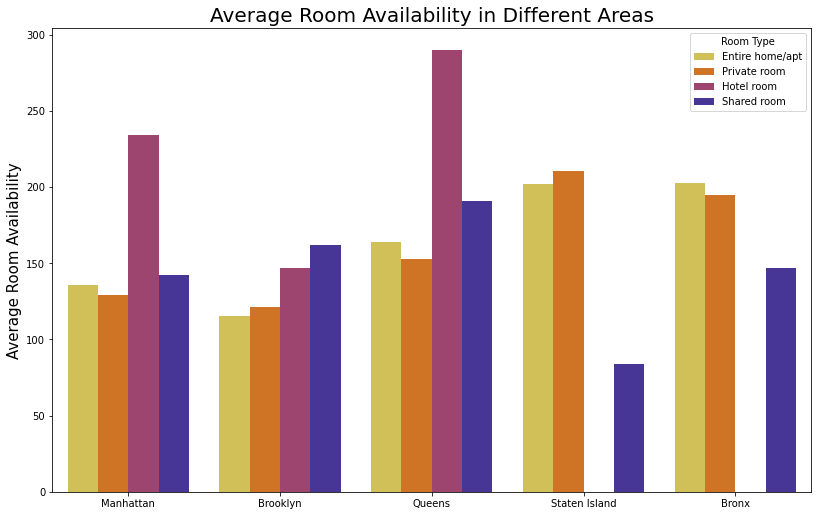

In [5]:
fig, ax = plt.subplots(figsize=(12,8))

avl = sns.barplot(x = 'neighbourhood_group', y = 'availability_365', data = df,hue='room_type',palette="CMRmap_r", ci=None)
avl.axes.set_title("Average Room Availability in Different Areas",fontsize=20)
avl.set_xlabel(" ")
avl.set_ylabel("Average Room Availability", fontsize=15)
avl.tick_params(labelsize=10)
avl.legend(title='Room Type')
plt.tight_layout(pad=3.0)

- Hotel room in Queens has the highest availability in 1 year among all area
- Hotel room and shared room have the highest availability in Manhattan, Brooklyn and Queens
- Hotel room have lowest availability in State Island and Bronx

# Data Preprocessing

## Feature Selection

to avoid overfitting and reduce noise in regression model, we will choose a feature that mostly affect price of airbnb properties. Among of them are: location, room type, minimum nights, availabilityand number of reviews

In [9]:
df = df[['neighbourhood_group','room_type','minimum_nights','number_of_reviews','availability_365','price']]

## Missing Value Handling

In [10]:
#finding missing value 
df.isnull().sum()

neighbourhood_group    0
room_type              0
minimum_nights         0
number_of_reviews      0
availability_365       0
price                  0
dtype: int64

In [11]:
df.isnull().sum()

neighbourhood_group    0
room_type              0
minimum_nights         0
number_of_reviews      0
availability_365       0
price                  0
dtype: int64

No missing value found

## Outlier Handling

<AxesSubplot:xlabel='price'>

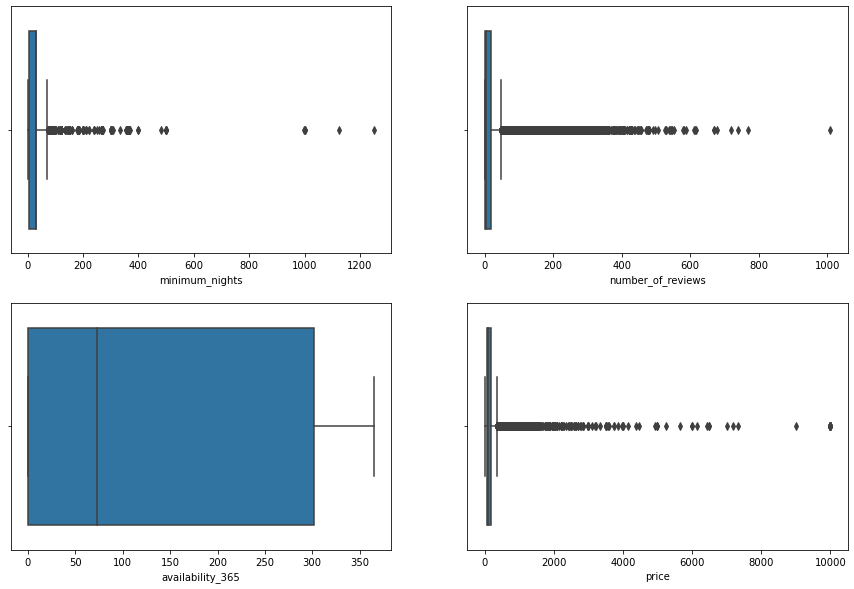

In [12]:
#Detecting outlier
fig, ax = plt.subplots(2,2,figsize=(15,10))

sns.boxplot(x=df['minimum_nights'], ax=ax[0,0])
sns.boxplot(x=df['number_of_reviews'], ax=ax[0,1])
sns.boxplot(x=df['availability_365'], ax=ax[1,0])
sns.boxplot(x=df['price'], ax=ax[1,1])

## Removing Outlier

In [29]:
#Minimum Nights
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - (1.5*IQR)
Upper_Bound = Q3 + (1.5*IQR)
df = df[(df['minimum_nights'] < Upper_Bound) & (df['minimum_nights'] > Lower_Bound)]

#Number of Reviews
Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - (1.5*IQR)
Upper_Bound = Q3 + (1.5*IQR)
df = df[(df['number_of_reviews'] < Upper_Bound) & (df['number_of_reviews'] > Lower_Bound)]

#Price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
Lower_Bound = Q1 - (1.5*IQR)
Upper_Bound = Q3 + (1.5*IQR)
df = df[(df['price'] < Upper_Bound) & (df['price'] > Lower_Bound)]

<AxesSubplot:xlabel='price'>

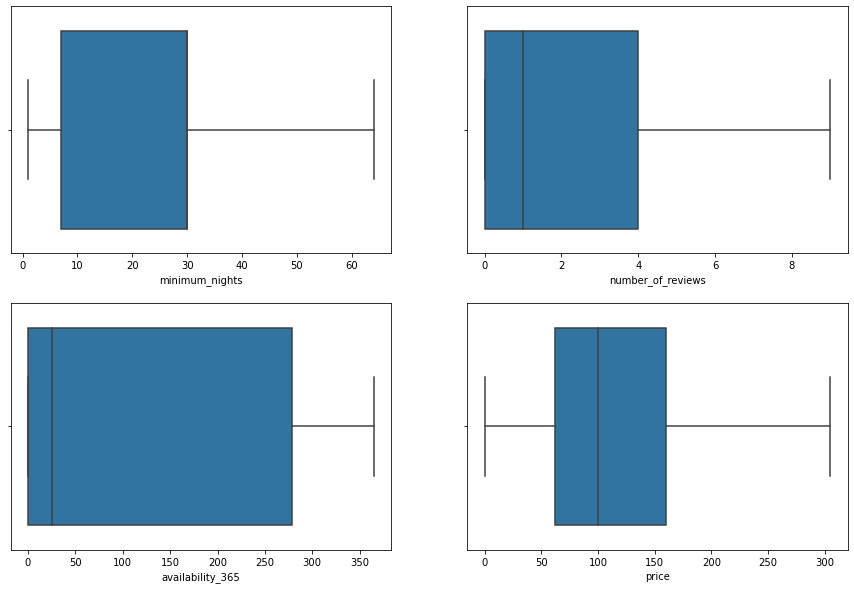

In [30]:
#Detecting outlier
fig, ax = plt.subplots(2,2,figsize=(15,10))

sns.boxplot(x=df['minimum_nights'], ax=ax[0,0])
sns.boxplot(x=df['number_of_reviews'], ax=ax[0,1])
sns.boxplot(x=df['availability_365'], ax=ax[1,0])
sns.boxplot(x=df['price'], ax=ax[1,1])

No outlier found

## Categorical Data Encoding (One-Hot Encoding)

In [31]:
#menggunakan one-hot encoding
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group','room_type'], prefix = ['neighbourhood_group','room_type'])

In [32]:
df_encoded.head()

,minimum_nights,number_of_reviews,availability_365,price,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
3,5,2,123,275,0,1,0,0,0,1,0,0,0
8,30,0,365,65,0,0,1,0,0,0,0,1,0
10,27,9,271,90,0,1,0,0,0,0,0,1,0
12,30,0,178,96,0,0,1,0,0,0,0,1,0
13,30,9,365,299,0,1,0,0,0,1,0,0,0


## Numeric Distribution and Normalization

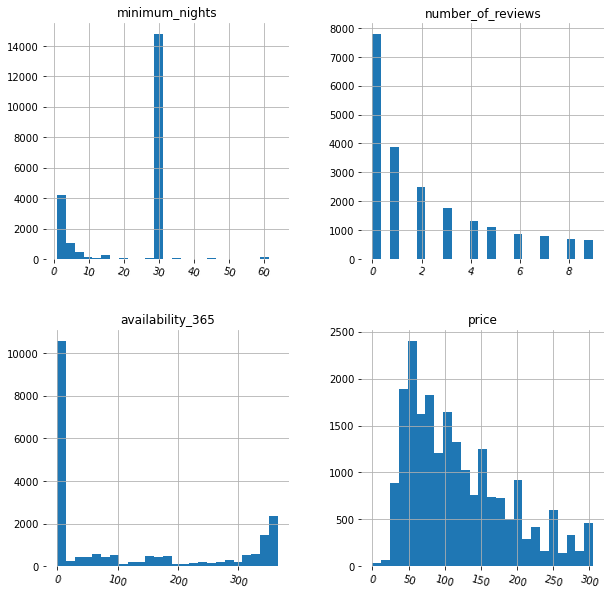

In [33]:
h = df_encoded[["minimum_nights",'number_of_reviews','availability_365','price']].hist(bins=25,figsize=(10,10),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];
#because data is not normally distributed, normalization will be used

In [34]:
#Normalization

#Copy data
df_max_scaled = df_encoded.copy()
  
#Normalization qith maximum absolute scaling
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      

display(df_max_scaled)

,minimum_nights,number_of_reviews,availability_365,price,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
3,0.078125,0.222222,0.336986,0.901639,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.468750,0.000000,1.000000,0.213115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10,0.421875,1.000000,0.742466,0.295082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,0.468750,0.000000,0.487671,0.314754,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13,0.468750,1.000000,1.000000,0.980328,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38271,0.468750,0.000000,0.254795,0.193443,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38272,0.015625,0.000000,0.983562,0.259016,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
38273,0.015625,0.000000,0.983562,0.249180,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
38274,0.015625,0.000000,0.030137,0.380328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Modelling (Regularized Regression)

## Split Data

In [35]:
#Determining Dependent and Independent Variable
x = df_max_scaled.drop(['price'], axis=1)
y = df_max_scaled['price']

In [36]:
#Splitting 80% data as train data and 20% data as test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

## Ridge Regression

In [37]:
#assuming alpha = 1
ridge=Ridge(alpha = 1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [38]:
#create model on train data
y_train_pred=ridge.predict(x_train)

#evaluating model on train data with RMSE dan r2
print('MSE Train ',mean_squared_error(y_train,y_train_pred)) 
print('RMSE Train ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('R2 Train ',r2_score(y_train, y_train_pred))

##evaluating model on test data with RMSE dan r2
y_test_pred= ridge.predict(x_test)
print('MSE Test ',mean_squared_error(y_test,y_test_pred)) 
print('RMSE Test ',np.sqrt(mean_squared_error(y_test,y_test_pred))) 
print('R2 Test ',r2_score(y_test, y_test_pred))

MSE Train  0.03013731512636823
RMSE Train  0.17360102282638842
R2 Train  0.41476365672522464
MSE Test  0.029768126413754845
RMSE Test  0.1725344209534864
R2 Test  0.41513867065189725


## Lasso Regression

In [53]:
#assuming alpha = 0.001
lasso=Lasso(alpha = 0.001)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001)

In [54]:
#create model on train data
y_train_pred=lasso.predict(x_train)

#evaluating model on train data with RMSE dan r2
print('MSE Train ',mean_squared_error(y_train,y_train_pred))
print('RMSE Train ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('R2 Train ',r2_score(y_train, y_train_pred))

##evaluating model on test data with RMSE dan r2
y_test_pred= lasso.predict(x_test)
print('MSE Test ',mean_squared_error(y_test,y_test_pred))
print('RMSE Test ',np.sqrt(mean_squared_error(y_test,y_test_pred))) 
print('R2 Test ',r2_score(y_test, y_test_pred))

MSE Train  0.030263515766148167
RMSE Train  0.17396412206586784
R2 Train  0.4123129672515917
MSE Test  0.029837216231499614
RMSE Test  0.17273452530255673
R2 Test  0.41378124687288664


# Hyperparameter Tuning

Finding the best alpha for each regression model

## Ridge Regression

In [55]:
folds=KFold(n_splits=5, shuffle=True, random_state=42)

#range hyperparameters
params={'alpha':[0.001,0.01,0.1,1]}

#Ridge model
model=Ridge()

#gridsearchcv
model_cv=GridSearchCV(estimator=model,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [56]:
#checking best alpha value
model_cv.best_params_

{'alpha': 1}

Best alpha for ridge regression model is 1

## Lasso Regression

In [58]:
folds=KFold(n_splits=5, shuffle=True, random_state=42)

#range hyperparameters
params={'alpha':[0.001,0.01,0.1,1]}

#Lasso model
model=Lasso()

#gridsearchcv
model_cv=GridSearchCV(estimator=model,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [59]:
#checking best alpha value
model_cv.best_params_

{'alpha': 0.001}

Best alpha for ridge regression model is 1

# Conclusion

- Airbnb price could vary depending on neighborhood and room types.
- Each neighborhood has different characteristic such as minimum nights a guest should spend, room availability and number of review depending on room type.
- Ridge regression with alpha = 1 will be used for regrssion model as it has higher r2 than lasso regression model. Higher r2 means a model could represent the proportion of the variance for a dependent variable that's explained by an independent variable.